In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Define

In [1]:
dataset_path = 'data'

In [3]:
import os
from collections import Counter

import numpy as np
from PIL import Image
import cv2

from matplotlib import pyplot as plt

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn import svm

from yellowbrick.classifier import ClassificationReport

In [4]:
!pip freeze > requirements.txt

# Read data demo

In [5]:
list_category = os.listdir(dataset_path)

In [6]:
def compress_png(img):
    rs = []
    for i in range(img.shape[0]):
        row = []
        for j in range(img.shape[1]):
            row.append(0 if ((img[i,j,0]==255) and (img[i,j,1]==255) and (img[i,j,2]==255)) else 1)
        rs.append(row)
    return rs

def read_img(path):
#     img = Image.open(path)
    img = cv2.imread(path)
    return compress_png(np.array(img))

In [7]:
img_path = os.path.join(dataset_path, list_category[0], os.listdir(os.path.join(dataset_path, list_category[0]))[0])
img_path

'data\\airplane\\1.png'

In [8]:
img = read_img(img_path)

In [9]:
Counter([item for sublist in img for item in sublist])

Counter({0: 63165, 1: 2371})

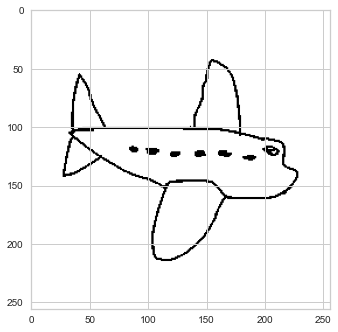

In [10]:
plt.imshow(img)

# Load full data

In [11]:
train_category = list_category[:20]

In [12]:
def flatten_data(img):
    return [item for sublist in img for item in sublist]

In [13]:
img_x = []
img_y = []

for cat in tqdm(train_category):
    base_path = os.path.join(dataset_path, cat)
    for img_file in os.listdir(base_path):
        img_path = os.path.join(base_path, img_file)
        img_x.append(flatten_data(read_img(img_path)))
        img_y.append(cat)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [11:50<00:00, 35.53s/it]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(img_x, img_y, test_size=0.33, random_state=42)

# Train & Report

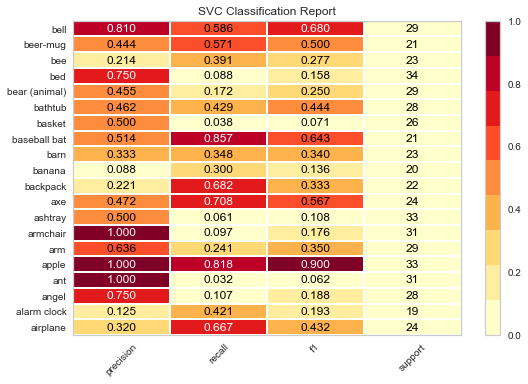

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [15]:
model = svm.SVC()
visualizer = ClassificationReport(model, classes=train_category, support=True)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show()                      

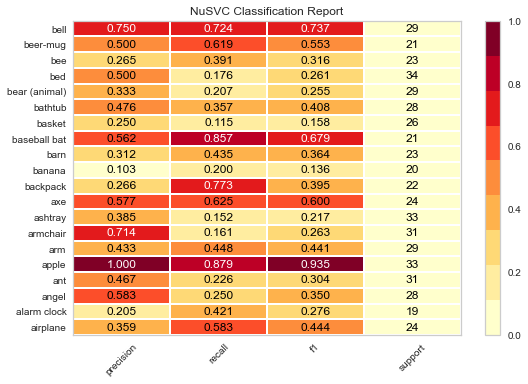

<AxesSubplot:title={'center':'NuSVC Classification Report'}>

In [16]:
model = svm.NuSVC()
visualizer = ClassificationReport(model, classes=train_category, support=True)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show()                  

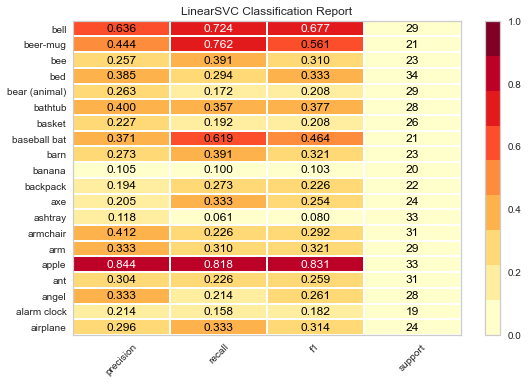

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [17]:
model = svm.LinearSVC()
visualizer = ClassificationReport(model, classes=train_category, support=True)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show()                  